In [53]:
!pip install tensorflow

In [54]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical #one hot encoding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
# dense is the hidden layer, flatten converts 3d array to 1d array

import numpy as np
import matplotlib.pyplot as plt

In [56]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)

In [57]:
tf.keras.backend.clear_session()


In [58]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [59]:
x_train.shape
# 28 rows 28 columns
# 60000 images

(60000, 28, 28)

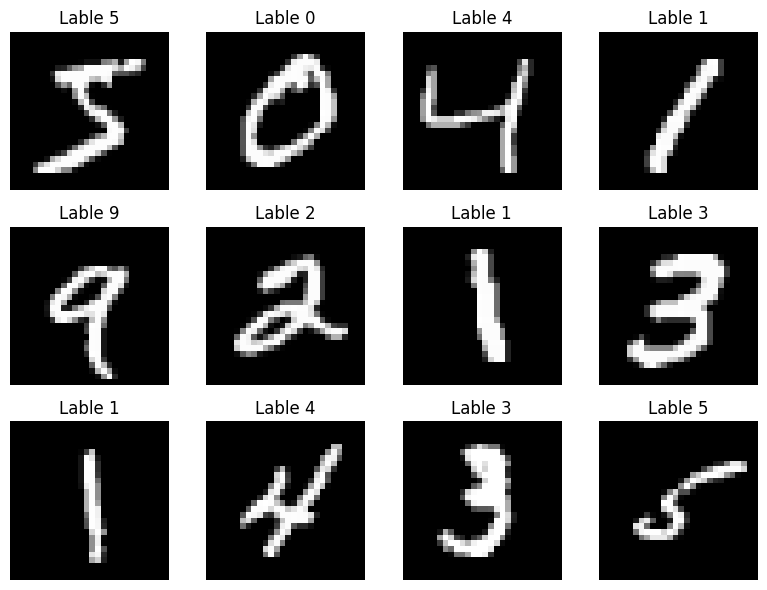

In [60]:
plt.figure(figsize=(8,6))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Lable {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [61]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
# values of pixels are from 0 to 255
#  we will bring the values between 0 to 1 because there are 60k photoes
# we will simply do scaling>> normalization>>x-xmin/xmax-xmin,xmin=0,xmax=255
# simply divide  by 255

In [63]:
x_train=x_train/255.0
x_test=x_test/255.0

In [64]:
y_train
# so there numbers are class so we can say that this is a classification prob

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [65]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [66]:
# first ann model
model=Sequential([
    Flatten(input_shape=(28,28)),#flattening the image>>28x28=784 features
    Dense(128,activation='relu'), # first hidden layer. why 128? anything in 2 ki power
    Dense(64,activation='relu'), #second
    Dense(10,activation='softmax') #output layer
]

)

In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
history=model.fit(x_train,y_train_cat,epochs=5,batch_size=100,validation_split=0.1,verbose=2)

Epoch 1/5


2026-01-12 06:19:50.347727: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


540/540 - 2s - 4ms/step - accuracy: 0.9086 - loss: 0.3281 - val_accuracy: 0.9563 - val_loss: 0.1455
Epoch 2/5
540/540 - 2s - 3ms/step - accuracy: 0.9600 - loss: 0.1339 - val_accuracy: 0.9697 - val_loss: 0.1093
Epoch 3/5
540/540 - 1s - 3ms/step - accuracy: 0.9711 - loss: 0.0941 - val_accuracy: 0.9753 - val_loss: 0.0882
Epoch 4/5
540/540 - 1s - 3ms/step - accuracy: 0.9791 - loss: 0.0679 - val_accuracy: 0.9742 - val_loss: 0.0898
Epoch 5/5
540/540 - 3s - 5ms/step - accuracy: 0.9831 - loss: 0.0542 - val_accuracy: 0.9792 - val_loss: 0.0778


In [70]:
test_loss,test_acc=model.evaluate(x_test,y_test_cat,verbose=0)

2026-01-12 06:19:59.996133: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


In [71]:
print(x_train.shape)
print(y_train_cat.shape)

print(x_test.shape)
print(y_test_cat.shape)


(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)


In [73]:
test_acc

0.974399983882904

In [74]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
y_pred_class=np.argmax(y_pred,axis=1)

In [77]:
# now in prediction we will check if we have recived the highest prob then that will be the ans

In [78]:
def show_random_prediction(model, x_test, y_test_cat):
    import numpy as np
    import matplotlib.pyplot as plt

    idx = np.random.randint(0, x_test.shape[0])
    img = x_test[idx]
    true_label = np.argmax(y_test_cat[idx])

    pred = model.predict(img.reshape(1, 28, 28), verbose=0)
    pred_label = np.argmax(pred)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label} | Predicted: {pred_label}")
    plt.show()


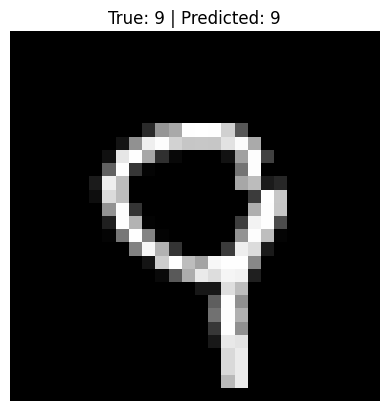

In [79]:
show_random_prediction(model, x_test, y_test_cat)


In [80]:
import numpy as np
import matplotlib.pyplot as plt

def show_random_predictions(model, x_test, y_test_cat, n=10):
    plt.figure(figsize=(10, 3))  # small images

    for i in range(n):
        idx = np.random.randint(0, x_test.shape[0])
        img = x_test[idx]
        true_label = np.argmax(y_test_cat[idx])

        pred = model.predict(img.reshape(1, 28, 28), verbose=0)
        pred_label = np.argmax(pred)

        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"T:{true_label} P:{pred_label}", fontsize=9)

    plt.tight_layout()
    plt.show()


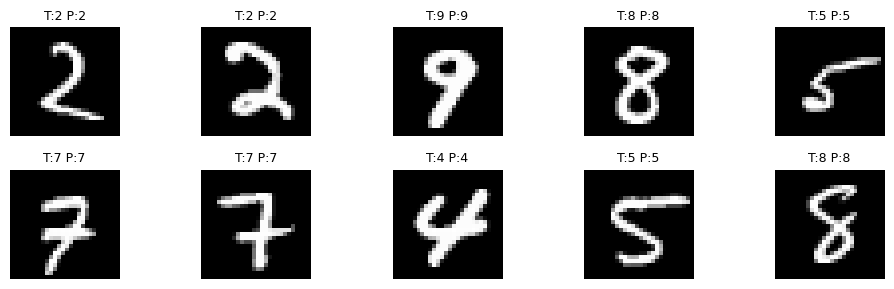

In [81]:
show_random_predictions(model, x_test, y_test_cat, n=10)


In [84]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.9 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 35.6 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


<Figure size 800x600 with 0 Axes>

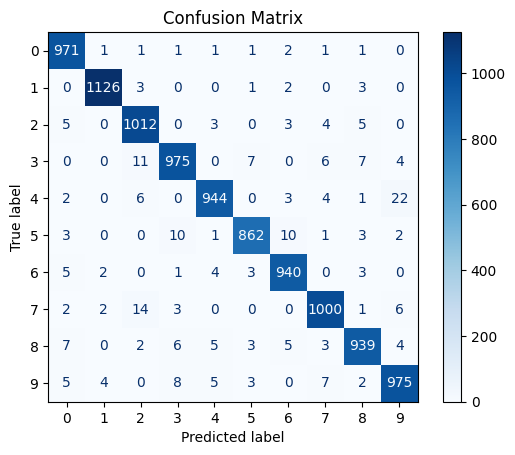

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(x_test, verbose=0)

# Convert one-hot to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()
